# Import Libraries

In [1]:
# Pandas
import pandas as pd

# Numpy 
import numpy as np

# Matplotlib and Seaborn
import seaborn as sns
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Load Data

In [2]:
# Load data
energy_data = pd.read_csv('Data/household_power_consumption.txt', sep=';',
            header=0, parse_dates={'DateTime' : ['Date','Time']}, infer_datetime_format=True, na_values=['nan','?'], index_col='DateTime')

# Exploratory Data Analysis

#### Print head of data

In [3]:
energy_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Features Information:

- __DateTime__ : Date and Time combined in format dd/mm/yyyy hh:mm:ss 
- __global_active_power__ : household global minute-averaged active power (in kilowatt). Active power is the power that is consumed.
- __global_reactive_power__ : Household global minute-averaged reactive power (in kilowatt). Reactive power is the unsed power in the lines
- __voltage__ : Minute-averaged voltage (in volt)
- __global_intensity__ : Household global minute-averaged current intensity (in ampere) 
- __sub_metering_1__ : Energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
- __sub_metering_2__ : Energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
- __sub_metering_3__ : Energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [4]:
# print shape of data
print('Data Shape : ', energy_data.shape)

Data Shape :  (2075259, 7)


In [5]:
# Print data types
energy_data.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [6]:
# Check for null values
energy_data.isnull().sum(axis=0)

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Analysis :
- In every feature there are 25979 null values
- Imputation can be done. But first lets visualize the data without imputation and understand if there are any repeating cyclic intervals that can give us more insight on imputation.

##  Data Visualization (Before Imputation)

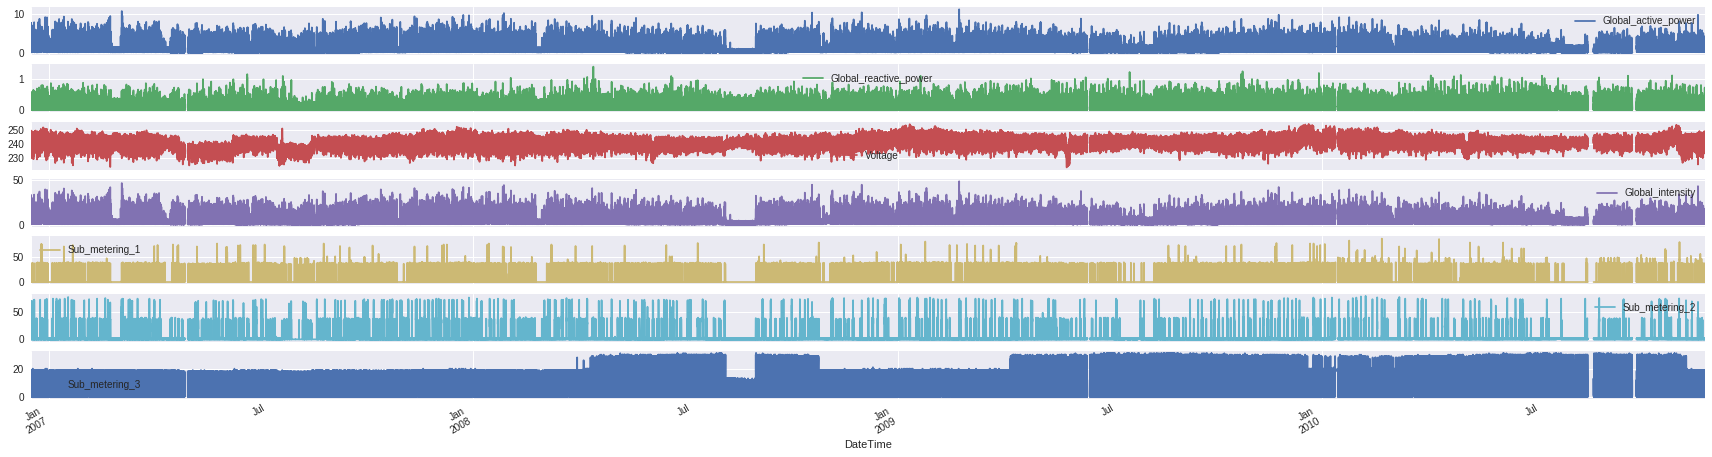

In [7]:
# Visualization as in whole
energy_data.plot(subplots=True, figsize=(30,8))
plt.show()

Analysis :
- It can be observed that there are missing values in the dataset.

> __Global Active Power__ : <br>
> > - It is observed that there is an yearly seasonal pattern in this feature with some spikes.

> __Global Reactive Power__ : <br>
> > - It is observed that there is an yearly seasonal pattern in this feature (with some spikes) but showing less variation as compared global_active_power.

> __Voltage__ : <br>
> > - It is observed that there is a strong repeating seasonal pattern in this feature across every year.
> > - In begining of every year it fluctuates a lot between 250 and 260 volts, but in between (near the month of july) in every year it kinds of reduces and then spikes again as the year ends.

> __Global Intensity__ : <br>
> > - It is observed that the values do spike towards the beginnig of each year but then go somewhat constant and then increase again during the end of each year.

> __Sub_metering_1__ : <br>
> > - This features represents the kitchen area of the house. It is observed that values for this feature is strongly constant throughout every year with some spikes representing heavy usage of kitchen during those time stamps.

> __Sub_metering_2__ : <br>
> > - This feature represents the laundary area of the house. It is observed that values for this feature are in periodic intervals throughout every year with some spikes representing heavy usage of laudary area during those time stamps.

> __Sub_metering_3__ : <br>
> > - This feature represents the electric water heater and the air conditioner in the house. 
> > > - For year 2007 : It is observed that the values almost remain constant throughout the year. Heater and air conditioner are equivalently used in their respective seasons.
> > > - For year 2008 : It is observed that the tempearture was too hot (near july) and cold (near aug). Hence, both the devices were used extensively.
> > > - For Year 2009 and 2010 : It is observed that from the month of May-2009 to November-2010 temperature became pretty ferocius (during noth summer and winter) and both the appliances were used extensively.

### Year wise visualization 

In [8]:
def feature_visualize_yearly(data, feat_name):
    
    fig, axis = plt.subplots(4, 1, figsize=(30,8))
    
    for i, d in enumerate(zip(axis, list(data[feat_name].groupby(data.index.year))[1:])):
        d[0].plot(pd.DataFrame(d[1][1]), label=d[1][0])
        d[0].legend(loc='upper right', fontsize='12', frameon=True).get_frame().set_edgecolor('blue') 
    
    fig.text(0.40, 0.9, 'Year-Wise Analysis : %s ' %feat_name, va='center',  fontdict={'fontsize': 25})
    plt.show()    

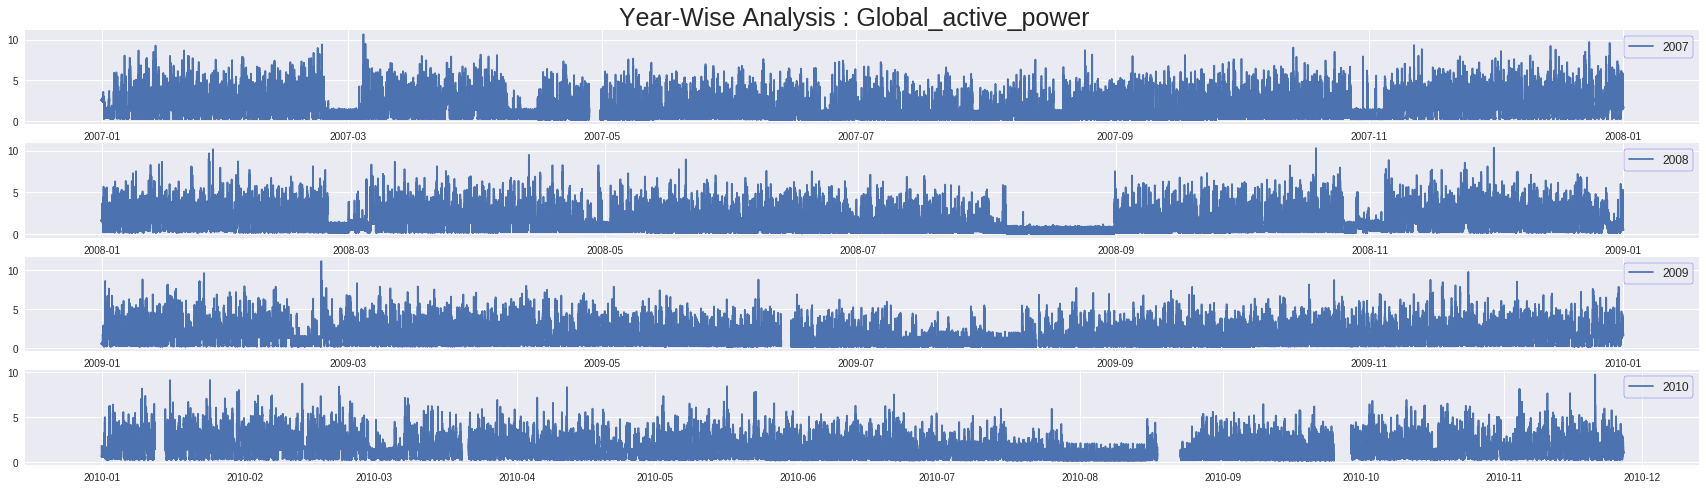

In [9]:
# Visualize Global_active_power
feature_visualize_yearly(data=energy_data, feat_name='Global_active_power')

Analysis:
- There are missing values in year 2007, 2009 and 2010.
- In every year a decreasing trend can be observed from July to August and an increasing trend from September to the end of that year.

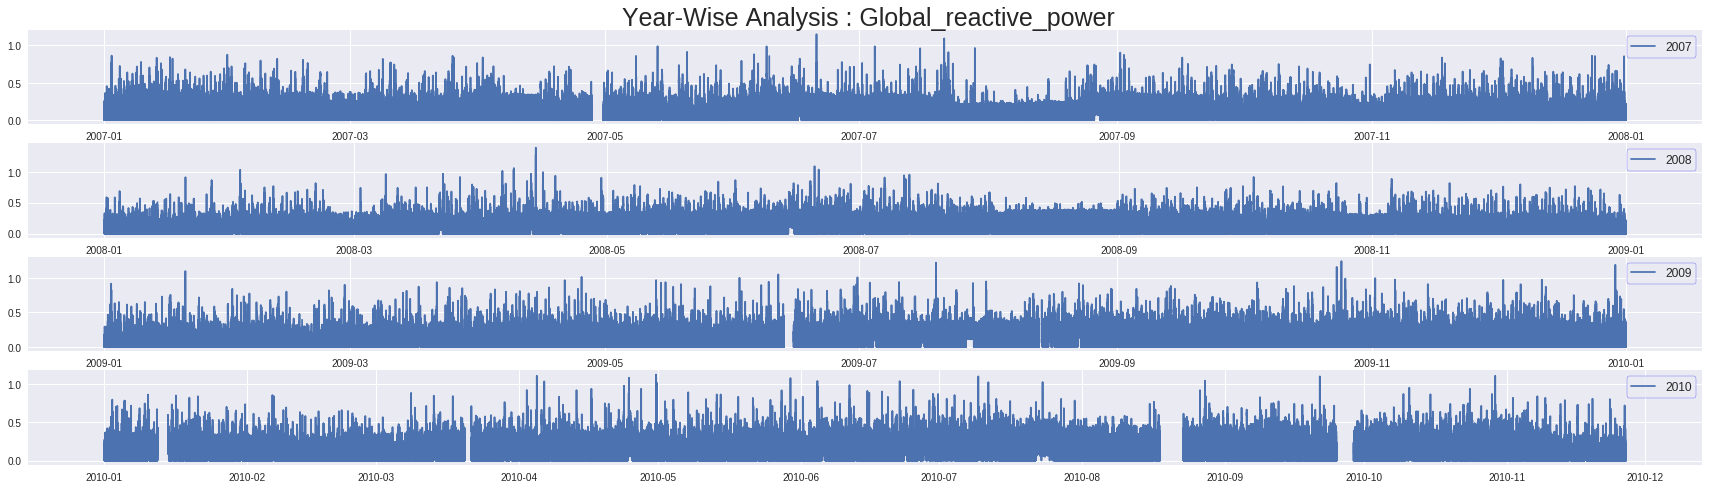

In [10]:
# Visualize Global_reactive_power
feature_visualize_yearly(data=energy_data, feat_name='Global_reactive_power')

Analysis:
- There are missing values in year 2007, 2009 and 2010.
- In every year a constant trend  (not perfectly constant) can be observed with some spikes throughout the year.

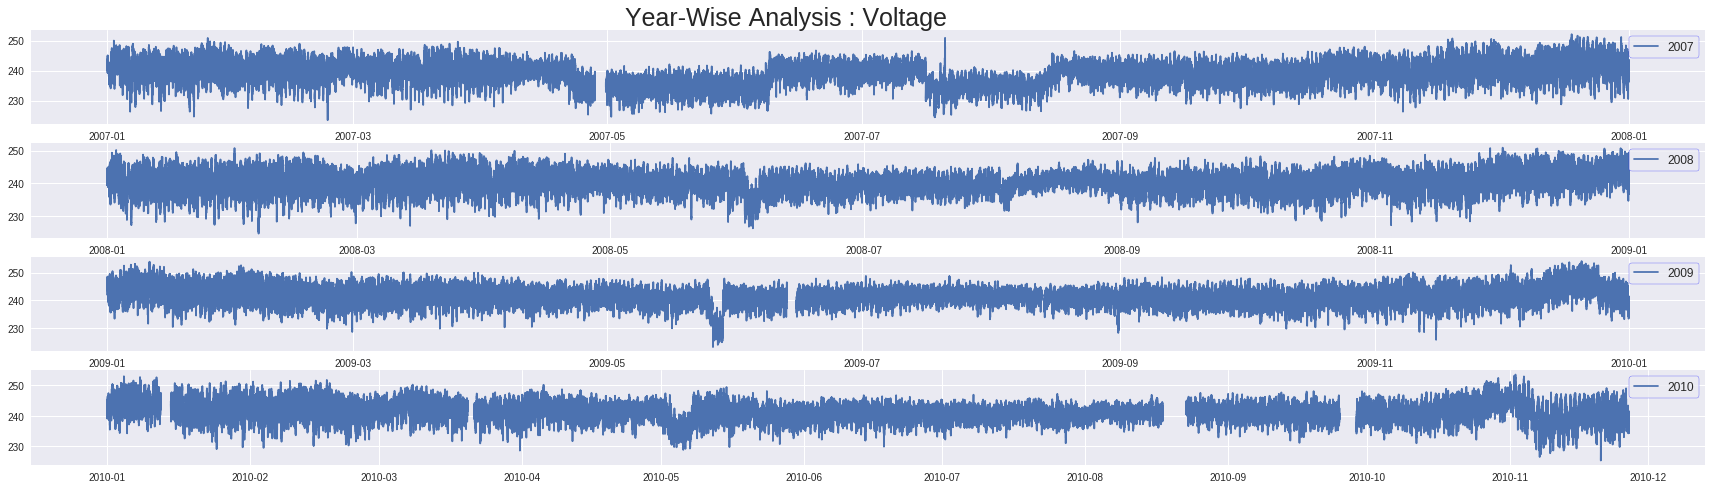

In [11]:
# Visualize Voltage
feature_visualize_yearly(data=energy_data, feat_name='Voltage')

Analysis:
- There are missing values in year 2007, 2009 and 2010.
- In every year a seasonal repeating trend can be observed with some high values near the begining and end of each year.

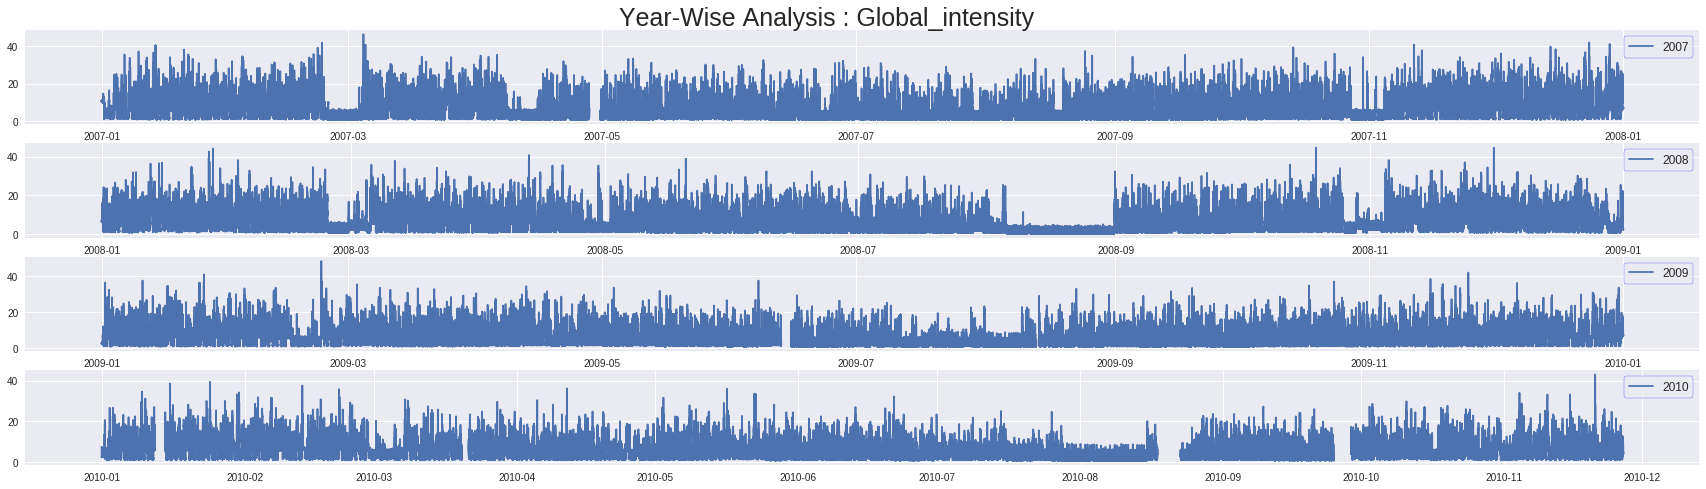

In [12]:
# Visualize Global_intensity
feature_visualize_yearly(data=energy_data, feat_name='Global_intensity')

Analysis:
- There are missing values in year 2007, 2009 and 2010.
- In every year value of this feature lowers down during the monoth of August.

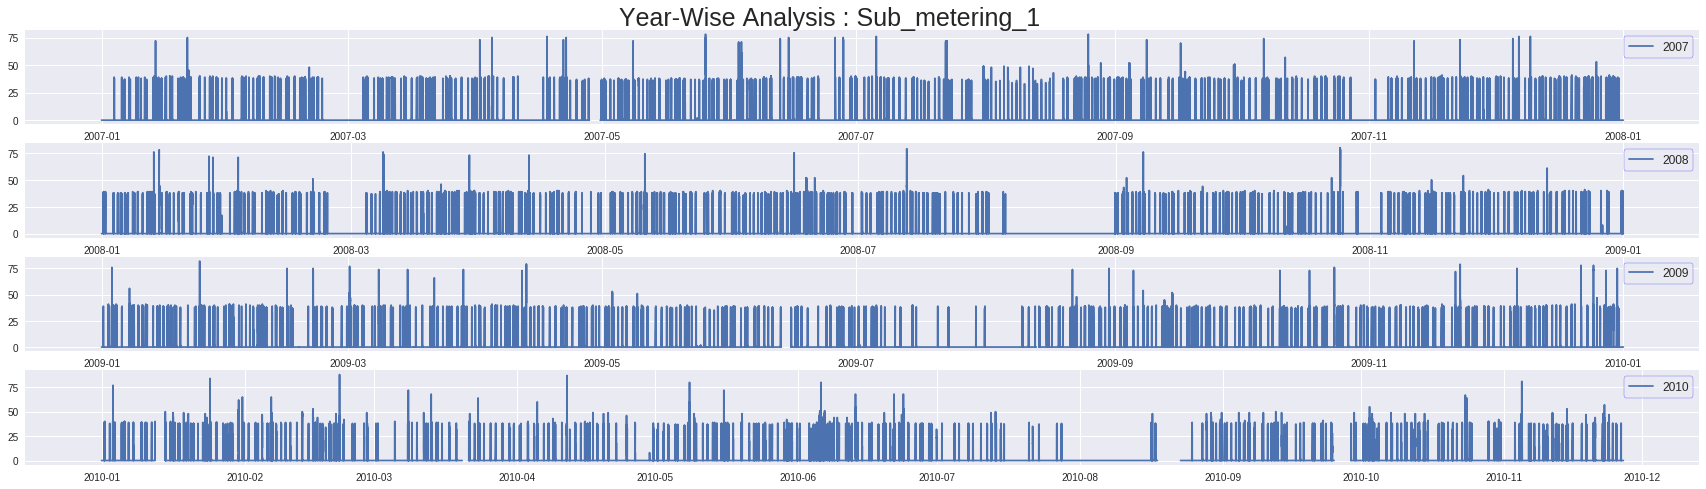

In [13]:
# Visualize Sub_metering_1
feature_visualize_yearly(data=energy_data, feat_name='Sub_metering_1')

Analysis:
- There are missing values in year 2007, 2009 and 2010.
- In every year a not so periodic contant trend can be observed.

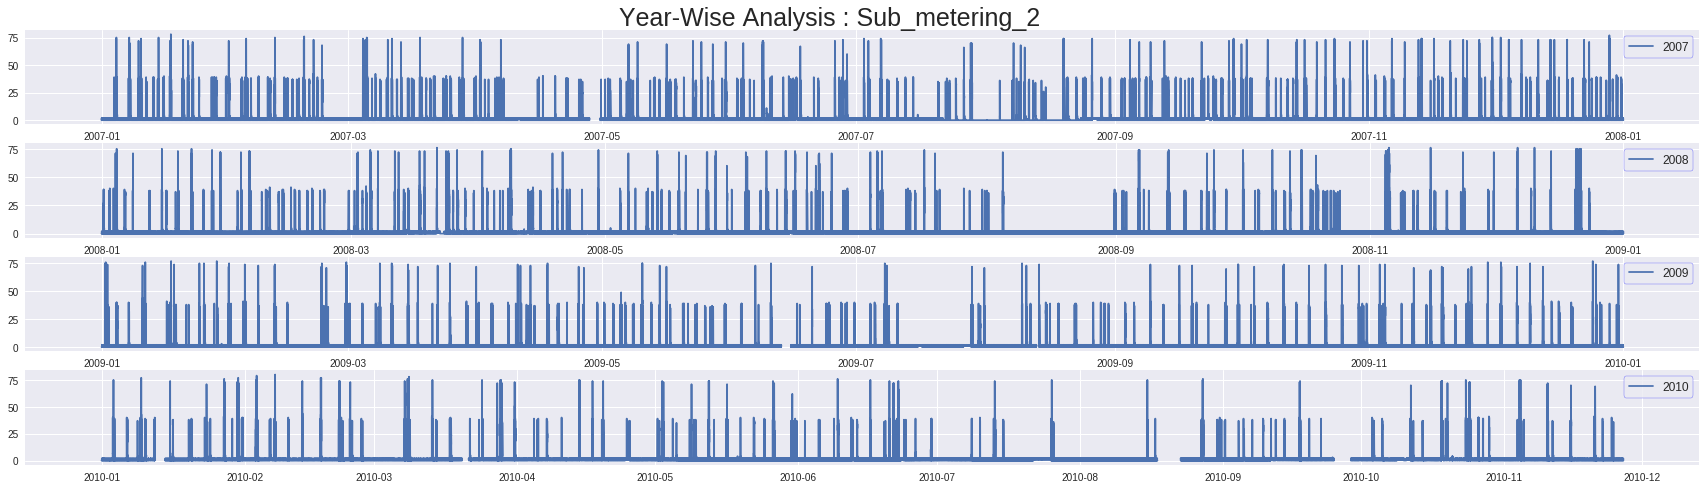

In [14]:
# Visualize Sub_metering_2
feature_visualize_yearly(data=energy_data, feat_name='Sub_metering_2')

Analysis:
- There are missing values in year 2007, 2009 and 2010.
- In every year a not so periodic contant trend can be observed. But much less than sub_metering_1 because this feature represents laundary area and laudary are is not used that much often.

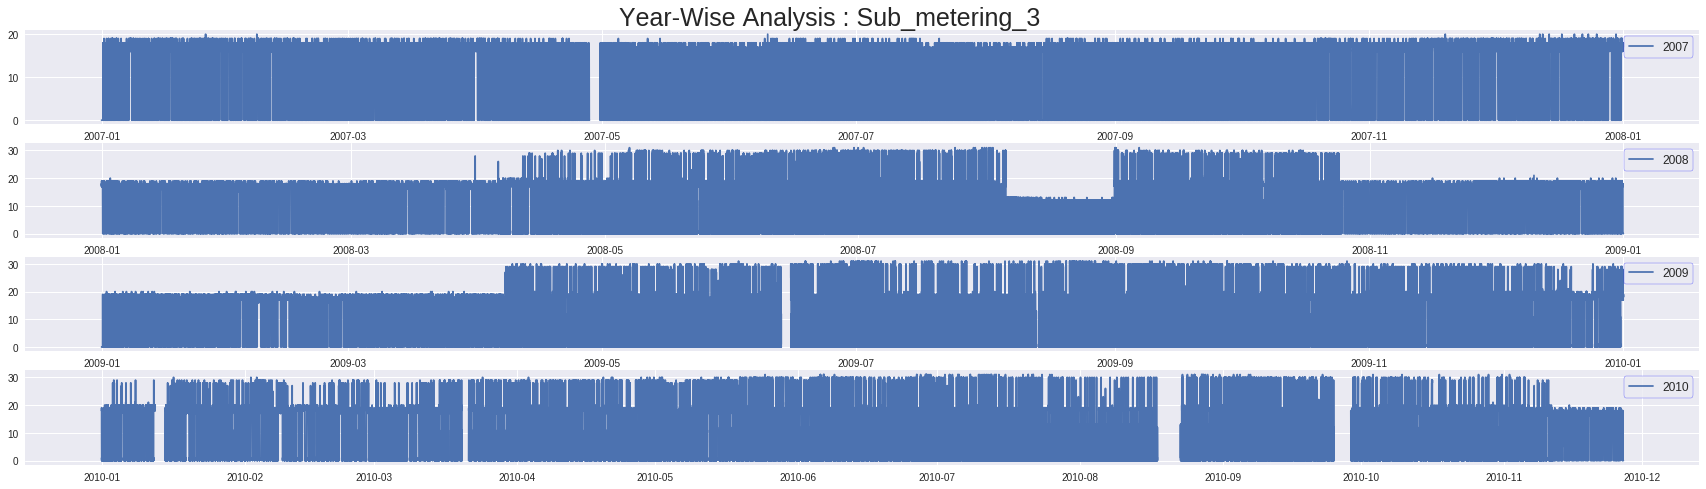

In [15]:
# Visualize Sub_metering_3
feature_visualize_yearly(data=energy_data, feat_name='Sub_metering_3')

Analysis:
- There are missing values in year 2007, 2009 and 2010.
- It can be observed that during year 2010, the electric water heater and air conditioner were used extensively as compared to previous years.

# Impute Values

- After visualizing features on yearly granularity and observing the seasonal patterns, missing values in a particular feature can be replaced with the mean of that particular feature computed with respect to its respective year.

In [16]:
def impute_nan_values(df):
    
    data = []
    for d in list(energy_data.groupby(energy_data.index.year)):
        
        data.append(d[1].fillna(d[1].mean()))
        
    return pd.DataFrame(np.vstack(data), index=df.index, columns=df.columns)

In [17]:
# impute NaN values
energy_data = impute_nan_values(energy_data)

In [18]:
# Check missing values after imputatioins
energy_data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

###  Data Visualization after imputation

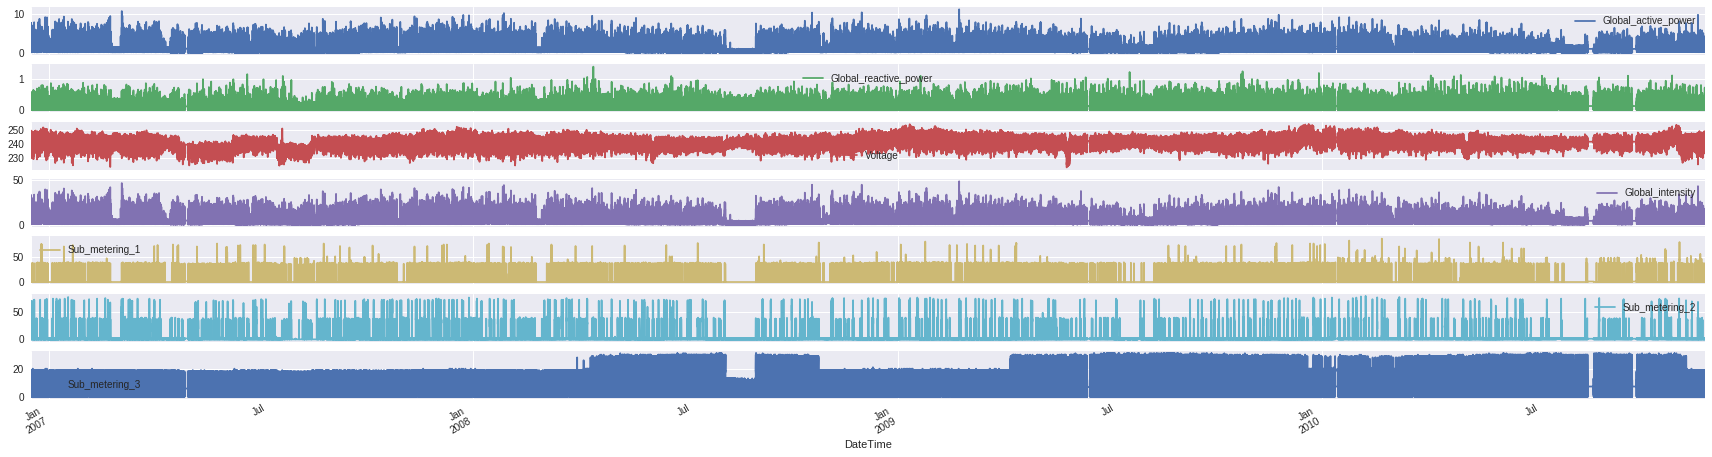

In [19]:
# Visualization energy data after imputation :
energy_data.plot(subplots=True, figsize=(30,8))
plt.show()

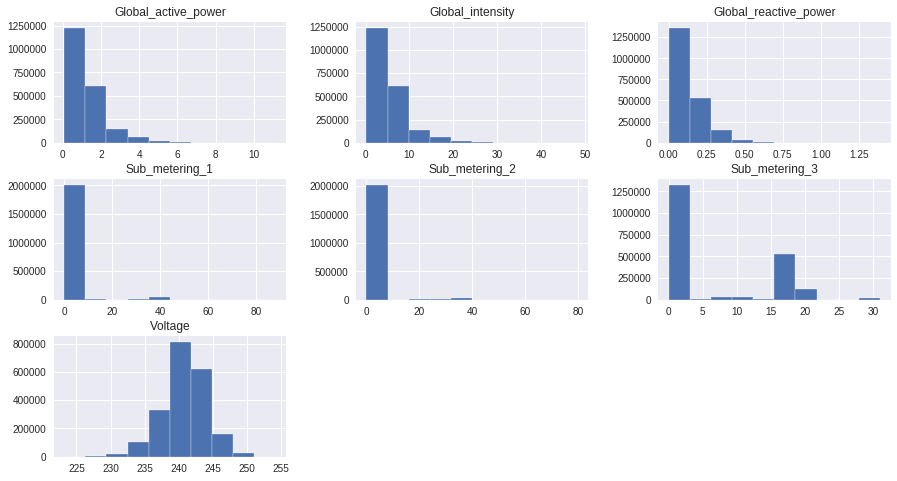

In [20]:
# Plot distribution of data after imputation
energy_data.hist(figsize=(15, 8))
plt.show()

Analysis :
- Voltage has close to normal distribution.
- Global_active_power, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_4 and Global_reactive_power have skewed distribution towards low values.

# Data resampling visualization
- The dataset is given on a minute level. 
- We will formulate the data on a different granularity level (downsample), which can be on hourly, daily or monthly basis etc.
- Visualizing resampled data will give on insights related to resampling level

__Note__ : Three critria are taken into consideration for selecting the granularity level.
> 1- Seasonal periodicity <br>
> 2- Distribution <br>
> 3- Correlation <br>

In [21]:
def resample_visualize(df, resample_level, title):
    
    # Resample data
    resampled_df = df.resample(resample_level).mean()
    
    # Plot Resampled Data set
    resampled_df.plot(subplots=True, figsize=(30,8), title=title)
    plt.show()    
    
    # Plot distribution
    print(' \n\n------------------------------------------ %s resampled distribution Plot------------------------------------------' %title)
    resampled_df.hist(figsize=(15, 8))
    plt.show()
    
    # Plot correlation plot
    print(' \n\n------------------------------------------ %s resampled correlation Plot------------------------------------------' %title)
    plt.figure(figsize=(10,10))
    sns.heatmap(resampled_df.corr(), annot=True, fmt=".2f")
    plt.show()

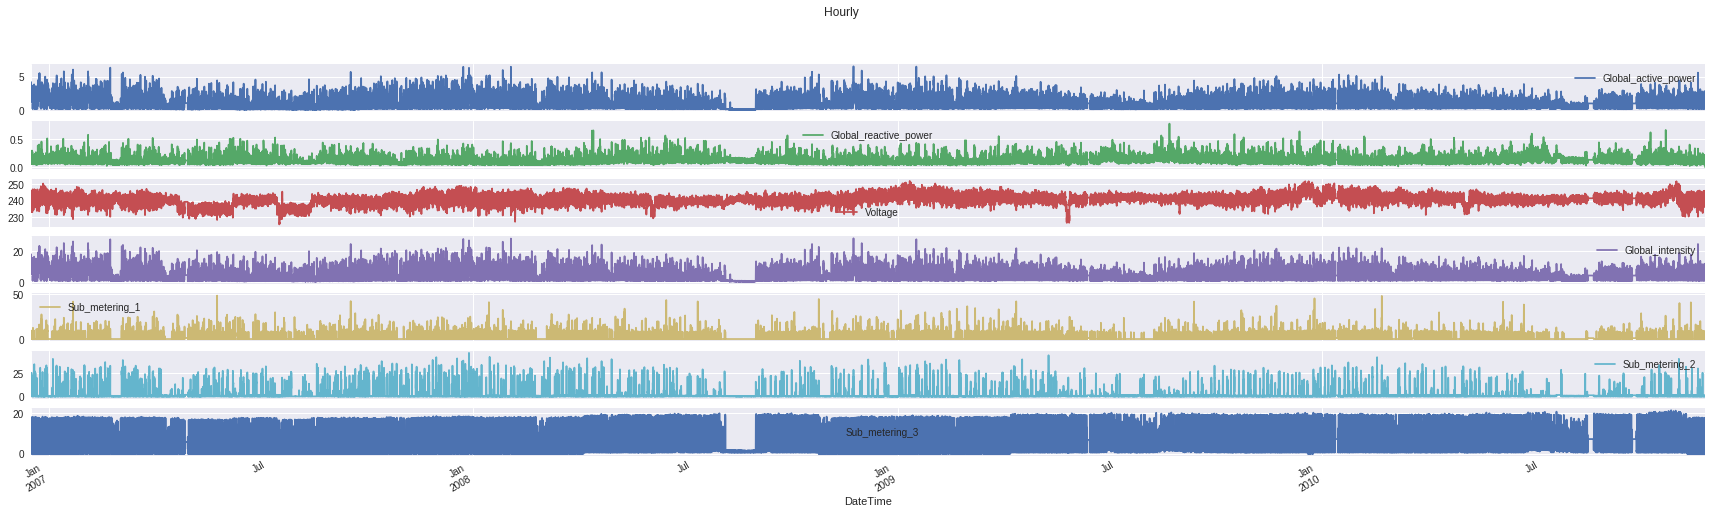

 

------------------------------------------ Hourly resampled distribution Plot------------------------------------------


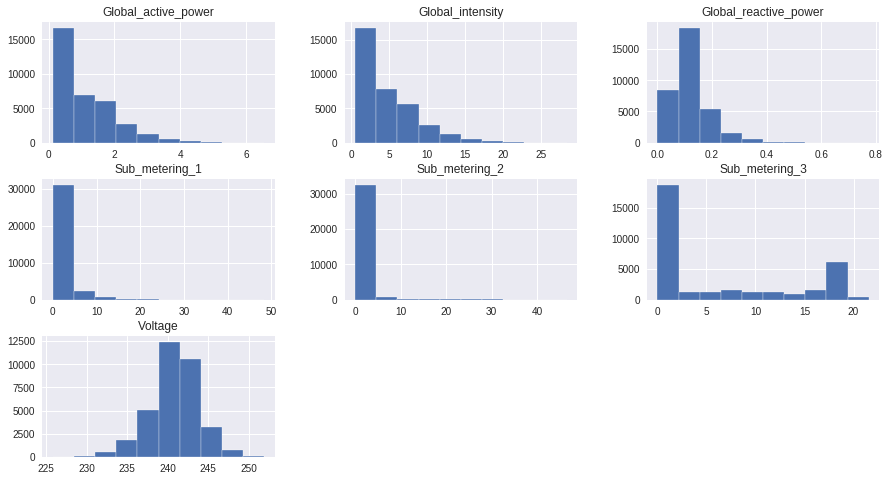

 

------------------------------------------ Hourly resampled correlation Plot------------------------------------------


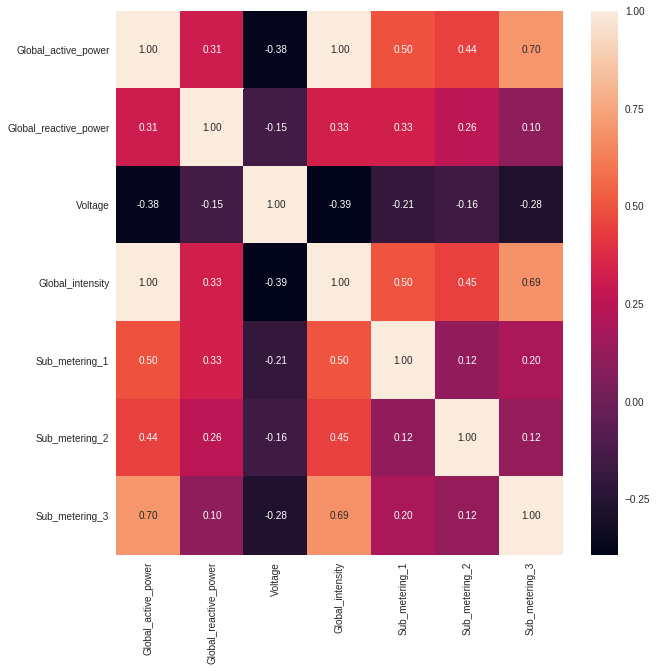

In [22]:
# visualize data on hourly basis
resample_visualize(energy_data, 'H', 'Hourly')

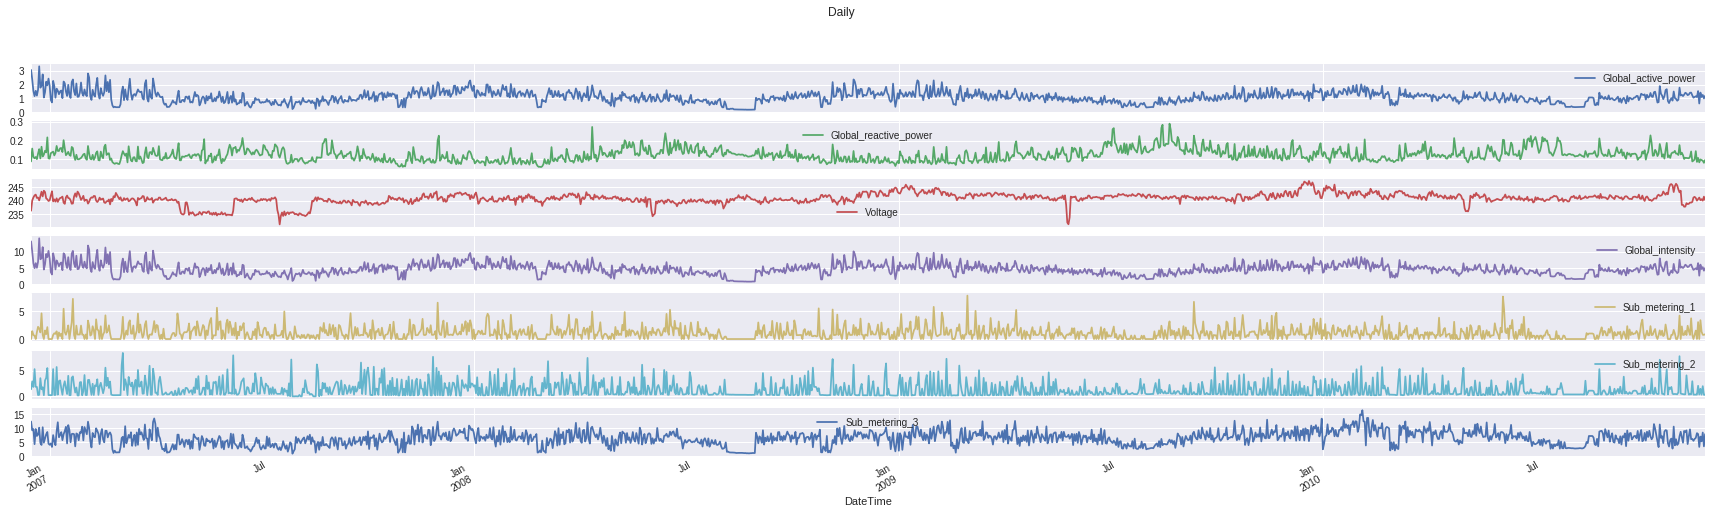

 

------------------------------------------ Daily resampled distribution Plot------------------------------------------


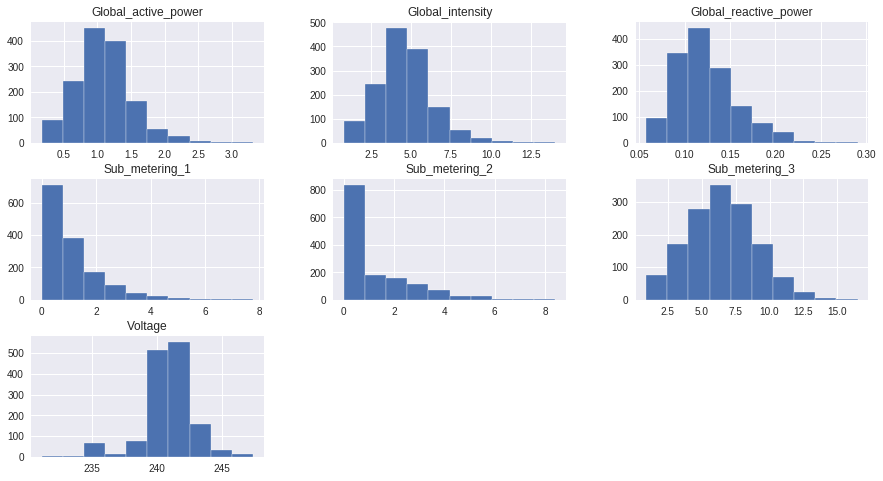

 

------------------------------------------ Daily resampled correlation Plot------------------------------------------


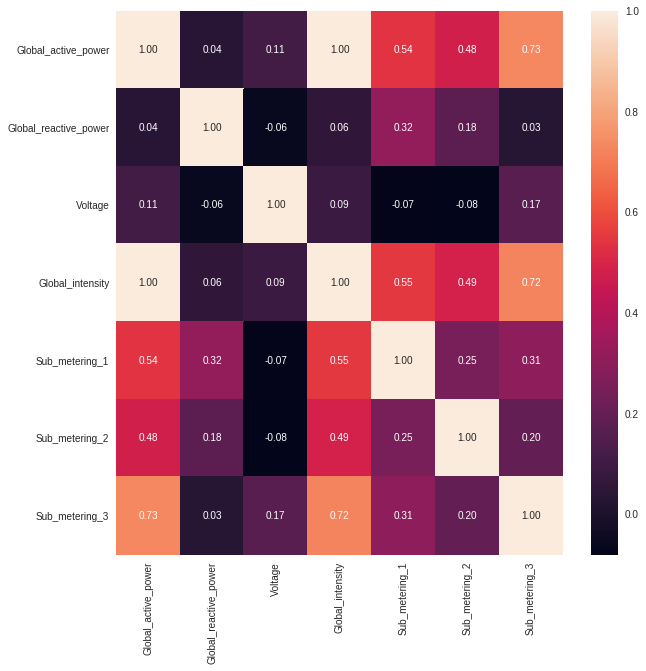

In [23]:
# visualize data on Daily basis
resample_visualize(energy_data, 'D', 'Daily')

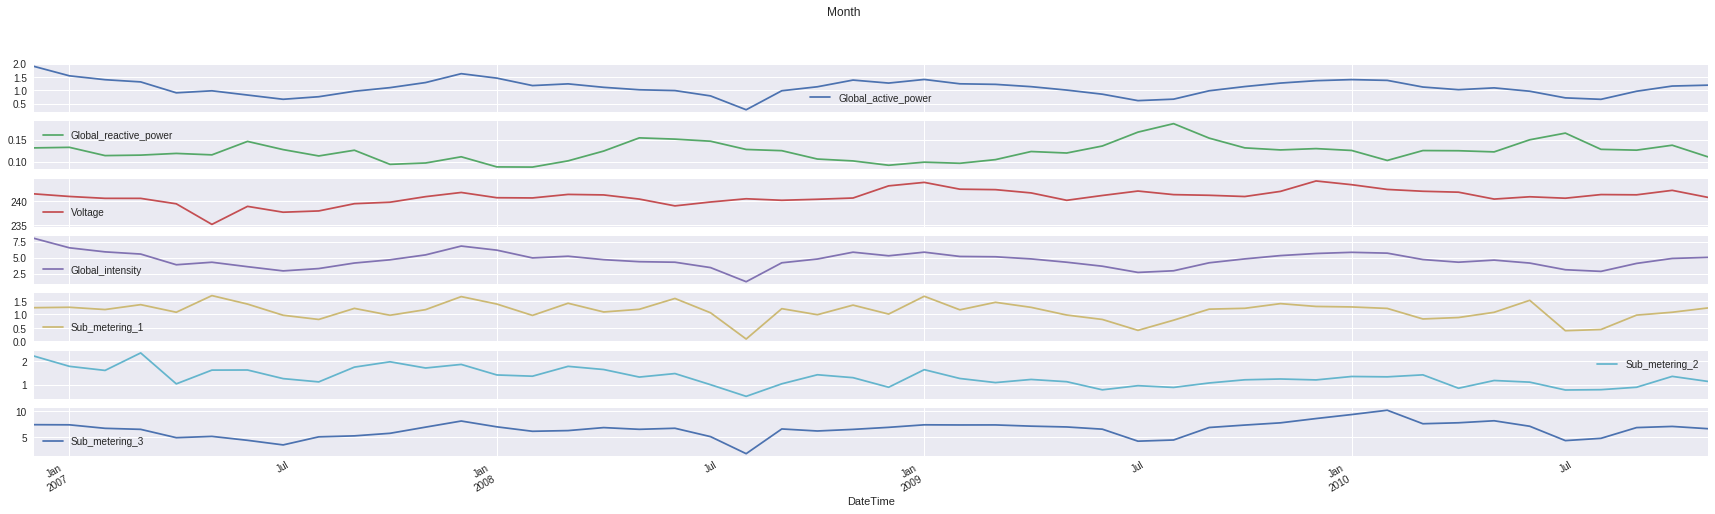

 

------------------------------------------ Month resampled distribution Plot------------------------------------------


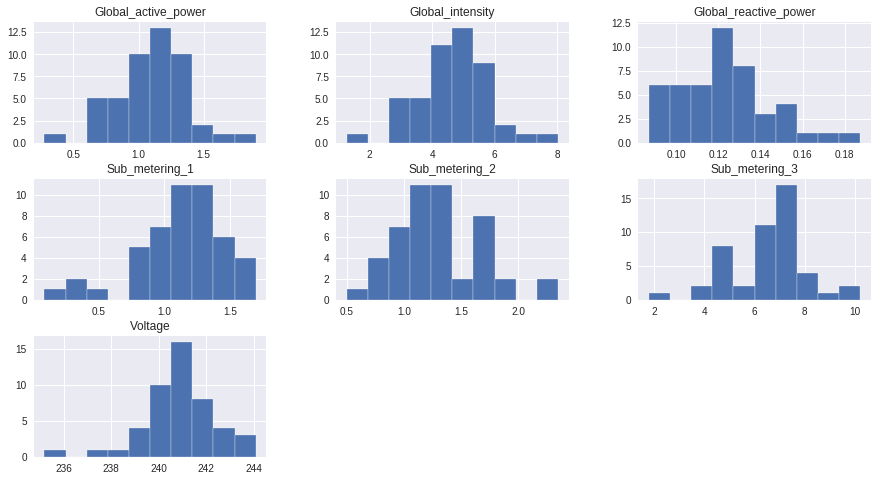

 

------------------------------------------ Month resampled correlation Plot------------------------------------------


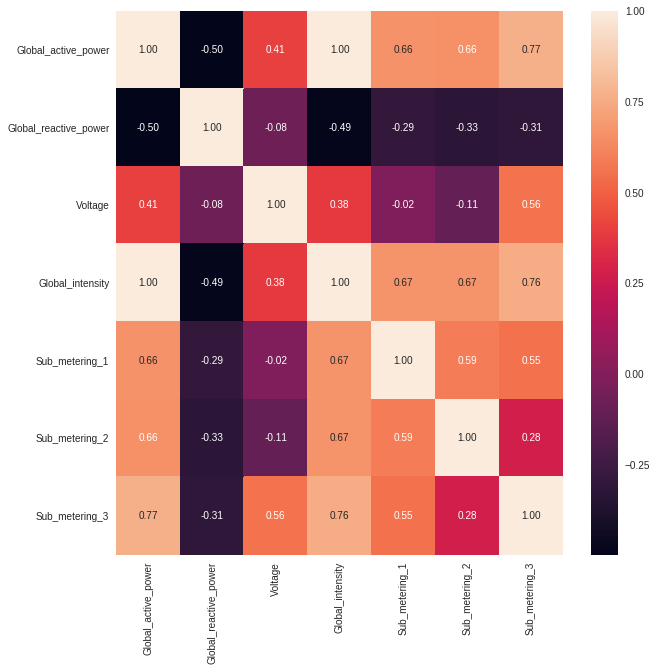

In [24]:
# visualize data on Daily basis
resample_visualize(energy_data, 'M', 'Month')

### Analysis :
- It is observed that as we increase the resampling criteria from hour to month :
> 1 - There is a drop in seasonal periodicity. <br>
> 2 - The distribution is becoming close to normal (not exactly normal) for some features. <br>
> 3 - An increase in correlation is observed between features. Global_intensity and global_active_power are highly correlated.

- After observing, will resample the dataset on hourly level and will drop global_intensity feature.

In [25]:
# Drop global_intensity feature
energy_data.drop(labels=['Global_intensity'], axis=1, inplace=True)

In [26]:
# shape before resampling
print('Shape before resampling (minute) : ',energy_data.shape)

Shape before resampling (minute) :  (2075259, 6)


In [27]:
# resample the data
energy_data_hour = energy_data.resample('H').mean()

In [28]:
# Shape after resampling
print('Shape after resampling (hour) : ',energy_data_hour.shape)

Shape after resampling (hour) :  (34589, 6)


In [32]:
# descriptive statistics
energy_data_hour.describe()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000
mean,1.091409,0.123764,240.844898,1.120976,1.297110,6.464531
std,0.891972,0.066405,2.983492,3.515991,4.166761,7.304481
min,0.124000,0.000000,225.834500,0.000000,0.000000,0.000000
25%,0.343667,0.078333,239.211833,0.000000,0.000000,0.650000
50%,0.821767,0.107800,241.005500,0.000000,0.333333,1.666667
75%,1.570200,0.148700,242.674167,0.000000,0.666667,13.950000
max,6.560533,0.774333,251.902000,48.366667,46.433333,21.550000


In [35]:
# Info of data
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 6 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(6)
memory usage: 110.8 MB


In [33]:
# Save imputed energy_data
energy_data_hour.to_csv('Data/household_power_consumption_imputed_and_resamplesd_hour.txt', index=False)